<a href="https://colab.research.google.com/github/senjuti238/ASD_Detection/blob/main/asd_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [ ]:
df = pd.read_csv('/content/Toddler Autism dataset July 2018.csv')

In [ ]:
df.columns


Index(['Case_No', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
       'Age_Mons', 'Qchat-10-Score', 'Sex', 'Ethnicity', 'Jaundice',
       'Family_mem_with_ASD', 'Who completed the test', 'Class/ASD Traits '],
      dtype='object')

In [ ]:
df.drop(['Case_No','Who completed the test'], axis=1, inplace=True)

In [ ]:
df.columns

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Age_Mons',
       'Qchat-10-Score', 'Sex', 'Ethnicity', 'Jaundice', 'Family_mem_with_ASD',
       'Class/ASD Traits '],
      dtype='object')

In [ ]:
df.head(10)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Class/ASD Traits
0,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,No
1,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,Yes
2,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,Yes
3,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,Yes
4,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,Yes
5,1,1,0,0,1,1,1,1,1,1,21,8,m,black,no,no,Yes
6,1,0,0,1,1,1,0,0,1,0,33,5,m,asian,yes,no,Yes
7,0,1,0,0,1,0,1,1,1,1,33,6,m,asian,yes,no,Yes
8,0,0,0,0,0,0,1,0,0,1,36,2,m,asian,no,no,No
9,1,1,1,0,1,1,0,1,1,1,22,8,m,south asian,no,no,Yes


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


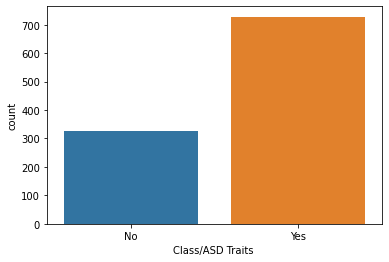

In [ ]:
import seaborn as sns
sns.countplot(df['Class/ASD Traits '])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   A1                   1054 non-null   int64 
 1   A2                   1054 non-null   int64 
 2   A3                   1054 non-null   int64 
 3   A4                   1054 non-null   int64 
 4   A5                   1054 non-null   int64 
 5   A6                   1054 non-null   int64 
 6   A7                   1054 non-null   int64 
 7   A8                   1054 non-null   int64 
 8   A9                   1054 non-null   int64 
 9   A10                  1054 non-null   int64 
 10  Age_Mons             1054 non-null   int64 
 11  Qchat-10-Score       1054 non-null   int64 
 12  Sex                  1054 non-null   object
 13  Ethnicity            1054 non-null   object
 14  Jaundice             1054 non-null   object
 15  Family_mem_with_ASD  1054 non-null   object
 16  Class/

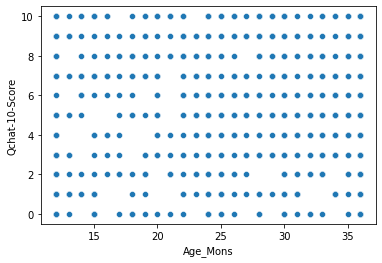

In [ ]:
sns.scatterplot(x='Age_Mons',y='Qchat-10-Score',data=df)

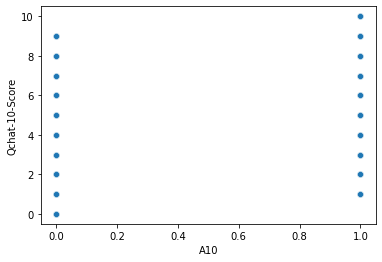

In [ ]:
sns.scatterplot(x='A10',y='Qchat-10-Score',data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text major ticklabel objects>)

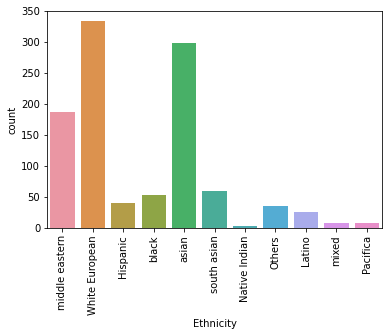

In [ ]:
sns.countplot(df['Ethnicity'])
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text major ticklabel objects>)

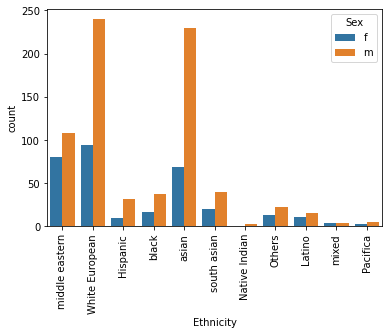

In [ ]:

sns.countplot(x='Ethnicity',hue='Sex',data=df)
plt.xticks(rotation=90)

#we can see that more survey respondants are males than females for each ethnicity

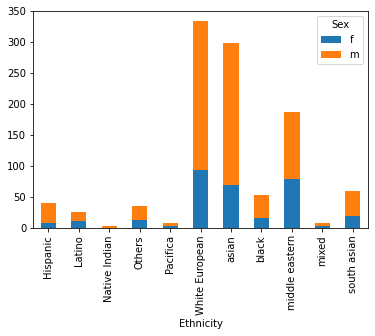

In [ ]:
df_plot = df.groupby(['Sex', 'Ethnicity']).size().reset_index().pivot(columns='Sex', index='Ethnicity', values=0)
# df_plot
df_plot.plot(kind='bar', stacked=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   A1                   1054 non-null   int64 
 1   A2                   1054 non-null   int64 
 2   A3                   1054 non-null   int64 
 3   A4                   1054 non-null   int64 
 4   A5                   1054 non-null   int64 
 5   A6                   1054 non-null   int64 
 6   A7                   1054 non-null   int64 
 7   A8                   1054 non-null   int64 
 8   A9                   1054 non-null   int64 
 9   A10                  1054 non-null   int64 
 10  Age_Mons             1054 non-null   int64 
 11  Qchat-10-Score       1054 non-null   int64 
 12  Sex                  1054 non-null   object
 13  Ethnicity            1054 non-null   object
 14  Jaundice             1054 non-null   object
 15  Family_mem_with_ASD  1054 non-null   object
 16  Class/

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text major ticklabel objects>)

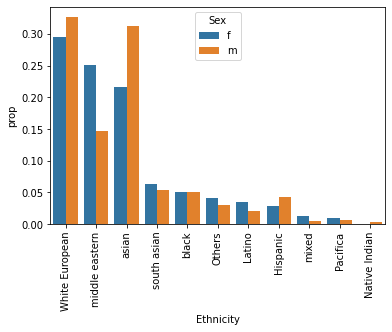

In [ ]:
x, y, hue = 'Ethnicity', 'prop', 'Sex'
prop_df = (df[x]
            .groupby(df[hue])
            .value_counts(normalize=True)
            .rename(y)
            .reset_index())
sns.barplot(x=x,y=y,hue=hue,data=prop_df)
plt.xticks(rotation=90)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


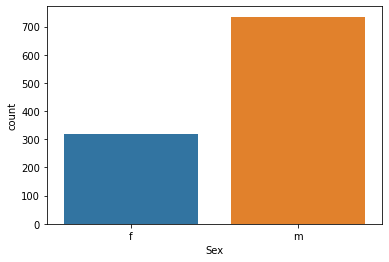

In [ ]:
sns.countplot(df['Sex'])
#we can see more males are are categorized as ASD thru the app

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   A1                   1054 non-null   int64 
 1   A2                   1054 non-null   int64 
 2   A3                   1054 non-null   int64 
 3   A4                   1054 non-null   int64 
 4   A5                   1054 non-null   int64 
 5   A6                   1054 non-null   int64 
 6   A7                   1054 non-null   int64 
 7   A8                   1054 non-null   int64 
 8   A9                   1054 non-null   int64 
 9   A10                  1054 non-null   int64 
 10  Age_Mons             1054 non-null   int64 
 11  Qchat-10-Score       1054 non-null   int64 
 12  Sex                  1054 non-null   object
 13  Ethnicity            1054 non-null   object
 14  Jaundice             1054 non-null   object
 15  Family_mem_with_ASD  1054 non-null   object
 16  Class/

In [ ]:
df.columns

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Age_Mons',
       'Qchat-10-Score', 'Sex', 'Ethnicity', 'Jaundice', 'Family_mem_with_ASD',
       'Class/ASD Traits '],
      dtype='object')

In [ ]:
features = df.drop(['Class/ASD Traits '], axis=1)
target = df['Class/ASD Traits ']

In [ ]:
features.head(10)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD
0,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no
1,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no
2,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no
3,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no
4,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes
5,1,1,0,0,1,1,1,1,1,1,21,8,m,black,no,no
6,1,0,0,1,1,1,0,0,1,0,33,5,m,asian,yes,no
7,0,1,0,0,1,0,1,1,1,1,33,6,m,asian,yes,no
8,0,0,0,0,0,0,1,0,0,1,36,2,m,asian,no,no
9,1,1,1,0,1,1,0,1,1,1,22,8,m,south asian,no,no


In [ ]:
target.head(50)

0      No
1     Yes
2     Yes
3     Yes
4     Yes
5     Yes
6     Yes
7     Yes
8      No
9     Yes
10    Yes
11    Yes
12     No
13    Yes
14     No
15    Yes
16     No
17    Yes
18     No
19    Yes
20    Yes
21    Yes
22    Yes
23    Yes
24    Yes
25     No
26    Yes
27    Yes
28    Yes
29     No
30     No
31     No
32     No
33     No
34     No
35    Yes
36     No
37     No
38     No
39     No
40     No
41     No
42     No
43     No
44     No
45     No
46     No
47     No
48     No
49     No
Name: Class/ASD Traits , dtype: object

In [ ]:
new_features = pd.get_dummies(features, drop_first = True)
new_features.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat-10-Score,Sex_m,Ethnicity_Latino,Ethnicity_Native Indian,Ethnicity_Others,Ethnicity_Pacifica,Ethnicity_White European,Ethnicity_asian,Ethnicity_black,Ethnicity_middle eastern,Ethnicity_mixed,Ethnicity_south asian,Jaundice_yes,Family_mem_with_ASD_yes
0,0,0,0,0,0,0,1,1,0,1,28,3,0,0,0,0,0,0,0,0,1,0,0,1,0
1,1,1,0,0,0,1,1,0,0,0,36,4,1,0,0,0,0,1,0,0,0,0,0,1,0
2,1,0,0,0,0,0,1,1,0,1,36,4,1,0,0,0,0,0,0,0,1,0,0,1,0
3,1,1,1,1,1,1,1,1,1,1,24,10,1,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,0,1,1,1,1,1,1,1,20,9,0,0,0,0,0,1,0,0,0,0,0,0,1


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(new_features, target, random_state = 2)

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_test)
logreg.score(x_train, y_train)

1.0

In [ ]:
#classification report
#confusion matrix
from sklearn.metrics import classification_report, confusion_matrix
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n          No       1.00      1.00      1.00        76\n         Yes       1.00      1.00      1.00       188\n\n    accuracy                           1.00       264\n   macro avg       1.00      1.00      1.00       264\nweighted avg       1.00      1.00      1.00       264\n'

In [ ]:
confusion_matrix(y_test,y_pred)

array([[ 76,   0],
       [  0, 188]])

In [ ]:
#KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=33)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n          No       0.94      0.97      0.95        76\n         Yes       0.99      0.97      0.98       188\n\n    accuracy                           0.97       264\n   macro avg       0.96      0.97      0.97       264\nweighted avg       0.97      0.97      0.97       264\n'

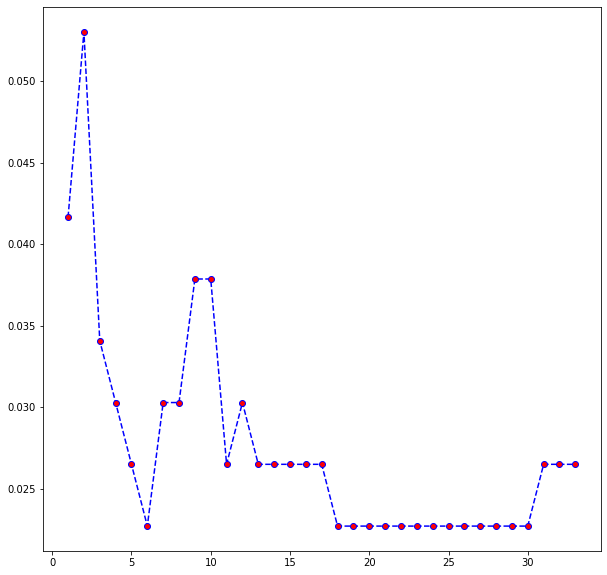

In [ ]:
import matplotlib.pyplot as plt
error_rate = []
for i in range(1,34):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    error_rate.append(np.mean(y_test != y_pred))
plt.figure(figsize=(10,10))
plt.plot(range(1,34), error_rate, color='blue',linestyle='dashed',marker='o',markerfacecolor='red')

In [ ]:
knn = KNeighborsClassifier(n_neighbors=27)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n          No       0.94      0.99      0.96        76\n         Yes       0.99      0.97      0.98       188\n\n    accuracy                           0.98       264\n   macro avg       0.97      0.98      0.97       264\nweighted avg       0.98      0.98      0.98       264\n'

In [ ]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(x_train, y_train)
y_pred = dtree.predict(x_test)
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n          No       1.00      1.00      1.00        76\n         Yes       1.00      1.00      1.00       188\n\n    accuracy                           1.00       264\n   macro avg       1.00      1.00      1.00       264\nweighted avg       1.00      1.00      1.00       264\n'

In [ ]:
confusion_matrix(y_test, y_pred)

array([[ 76,   0],
       [  0, 188]])

In [ ]:
#let's try random forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n          No       1.00      1.00      1.00        76\n         Yes       1.00      1.00      1.00       188\n\n    accuracy                           1.00       264\n   macro avg       1.00      1.00      1.00       264\nweighted avg       1.00      1.00      1.00       264\n'

In [ ]:
confusion_matrix(y_test, y_pred)

array([[ 76,   0],
       [  0, 188]])

In [ ]:
from sklearn.svm import SVC
model = SVC()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n          No       0.94      1.00      0.97        76\n         Yes       1.00      0.97      0.99       188\n\n    accuracy                           0.98       264\n   macro avg       0.97      0.99      0.98       264\nweighted avg       0.98      0.98      0.98       264\n'

**RandomForest Classifier, DecisionTree Classifier and Logistic Regression have high probability of overfitting**

**Support Vector Machine and KNeighbors Classifier are giving best outcomes with good fit models**